# Real-world Data Wrangling

In [1]:
#!python -m pip install kaggle==1.6.12

In [2]:
#!pip install --target=/workspace ucimlrepo numpy==1.24.3

In [3]:
# Packages will be used
import pandas as pd
import matplotlib.pyplot as plt
import kaggle

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

in this project, I will gather two datasets by using two different methods which will be listed down.

In this project, I will assess the data and I will clean them and combine them two answer questions.

*   *Q1* ( How many movies before 2000 and after ? )
*   *Q2* ( What is year has most released  of movies ? )
*   *Q3* ( Which year had the highest average movie duration, and how did the average durations vary across years? )

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:
- Download data manually 👍
- Gather data by accessing APIs 👍

#### **Dataset 1**

Type: *tmdb_5000_movies* (CSV File.)

Method: *The data was gathered using the "Download data manually" method from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) source*
budget                4803 non-null   int64


Dataset variables:

*   *genres*
*   *homepage*
*   *id*
*   *keyword*
*   *original_language*
*   *original_title*
*   *overview*
*   *popularity*
*   *production_companies*
*   *production_countries*
*   *release_date*
*   *revenue*
*   *runtime*
*   *spoken_languages*
*   *status*
*   *tagline*
*   *vote_average*
*   *vote_count*

In [4]:
#FILL IN 1st data gathering and loading method
# read the file
df_tmdb = pd.read_csv('tmdb_5000_movies.csv')

#### Dataset 2

Type: *netflix_titles* (CSV File.)

Method: *API* (The data was gathered using the "API" method from [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows/code) source.)

*   *show_id*
*   *type*
*   *title*
*   *director*
*   *cast*
*   *country*
*   *date_added*
*   *release_year*
*   *rating*
*   *duration*
*   *listed_in*
*   *description*

In [5]:
#FILL IN 2nd data gathering and loading method

kaggle.api.authenticate() # authenticate with the kaggle API

# path '.' to make sure save the file in same folder and without zip it
kaggle.api.dataset_download_files('shivamb/netflix-shows', path='.' ,unzip=True)

# read the file
df_netflix = pd.read_csv('netflix_titles.csv')

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [6]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Wrong data type for both Datasets

In [7]:
#FILL IN - Inspecting the dataframe visually
# use info() to discover the data
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
# wrong data type for release_date must be data time
df_tmdb['release_date'].head(3)

0    2009-12-10
1    2007-05-19
2    2015-10-26
Name: release_date, dtype: object

In [9]:
# data type for runtime is float64, which not good for memory, will be int16
df_tmdb['runtime'].max()

338.0

In [10]:
# show 5 rows
df_tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
#FILL IN - Inspecting the dataframe programmatically
df_tmdb.tail(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


Issue and justification: *Wrong data type fot 2 rows is mistake when analysis the data*

In [12]:
#FILL IN - Inspecting the dataframe visually
# use info() to discover the data
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
# wrong data type for date_added must be data time
df_netflix['date_added'].head(3)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

In [14]:
df_netflix['date_added'].tail(3)
#FILL IN - Inspecting the dataframe programmatically

8804    November 1, 2019
8805    January 11, 2020
8806       March 2, 2019
Name: date_added, dtype: object

In [15]:
df_netflix.head(5)
# print few rows from top

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df_netflix.tail(5)
# print few rows from down

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Issue and justification: *Wrong data type fot 2 rows is mistake when analysis the data*


### Quality Issue 2: Missing Values in both Dataset

In [17]:
#FILL IN - Inspecting the dataframe visually
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
#FILL IN - Inspecting the dataframe programmatically
# show how many nulls
print(df_tmdb.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


Issue and justification:
- df_tmdb has some missing values:
- homepage
- runtime
- tagline
These are (3)

In [19]:
#FILL IN - Inspecting the dataframe visually
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
#FILL IN - Inspecting the dataframe programmatically
print(df_netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Issue and justification:
- This DataFrame has some missing values which are:
- director
- cast
- country
- date_added
- rating
- rating
these are (6)

### Tidiness Issue 1: Multiple Variables in Type, Only Movie for Netflix dataset

In [21]:
#FILL IN - Inspecting the dataframe visually

df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
# show some rows
df_netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [23]:
# only print type
df_netflix['type'].head(10)

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
5    TV Show
6      Movie
7      Movie
8    TV Show
9      Movie
Name: type, dtype: object

In [24]:
#FILL IN - Inspecting the dataframe programmatically
df_netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Issue and justification: *for this data set, only Movie is require*

### Tidiness Issue 2: Multiple Variables in rating for Netflix dataset

In [25]:
#FILL IN - Inspecting the dataframe visually

df_netflix['rating'].unique()

# unexpected values like durations which is wrong, they are '74 min', '84 min', '66 min'

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
# make a list with mistake values
invalid_ratings = ["74 min", "84 min", "66 min"]

In [27]:
# filter out row
invalid_rows = df_netflix[df_netflix['rating'].isin(invalid_ratings)]

In [28]:
#FILL IN - Inspecting the dataframe programmatically
invalid_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Issue and justification: *Rows with these mistake is incorrect*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [29]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_tmdb_cleaned = df_tmdb.copy()
df_netflix_cleaned = df_netflix.copy()

### **Quality Issue 1: Missing Values in both Dataset**

In [30]:
# FILL IN - Apply the cleaning strategy
# drop rows with missing values
df_tmdb_cleaned.dropna(inplace=True)

In [31]:
df_tmdb_cleaned.info()
# show after drop

<class 'pandas.core.frame.DataFrame'>
Index: 1493 entries, 0 to 4801
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   homepage              1493 non-null   object 
 3   id                    1493 non-null   int64  
 4   keywords              1493 non-null   object 
 5   original_language     1493 non-null   object 
 6   original_title        1493 non-null   object 
 7   overview              1493 non-null   object 
 8   popularity            1493 non-null   float64
 9   production_companies  1493 non-null   object 
 10  production_countries  1493 non-null   object 
 11  release_date          1493 non-null   object 
 12  revenue               1493 non-null   int64  
 13  runtime               1493 non-null   float64
 14  spoken_languages      1493 non-null   object 
 15  status                1493

In [32]:
# FILL IN - Validate the cleaning was successful
print(df_tmdb_cleaned.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [33]:
# FILL IN - Apply the cleaning strategy
# drop rows with missing values
df_netflix_cleaned.dropna(inplace=True)

In [34]:
df_netflix_cleaned.info()
# show after drop

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [35]:
# FILL IN - Validate the cleaning was successful
print(df_netflix_cleaned.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Justification: *I must drop missing values first, so I can change data type easily with lee code, if i did not do this, I have to apply many changes with NaN values, so less operation high efficiency*

### **Quality Issue 2: Wrong data type for both Datasets**

In [36]:
#FILL IN - Apply the cleaning strategy, Dataset1
df_tmdb_cleaned[['release_date', 'runtime']].dtypes

release_date     object
runtime         float64
dtype: object

In [37]:
# change the data types:
df_tmdb_cleaned['release_date'] = pd.to_datetime(df_tmdb_cleaned['release_date'])
df_tmdb_cleaned['runtime'] = df_tmdb_cleaned['runtime'].astype('int16')

In [38]:
#FILL IN - Validate the cleaning was successful
df_tmdb_cleaned[['release_date', 'runtime']].dtypes

release_date    datetime64[ns]
runtime                  int16
dtype: object

In [39]:
#FILL IN - Apply the cleaning strategy, Dataset2
# wrong data type for date_added in netflix
df_netflix_cleaned.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [40]:
# change the data types:
# some mistake in value August 4, 2017, so:
df_netflix_cleaned['date_added'] = pd.to_datetime(df_netflix_cleaned['date_added'], format='mixed', errors='coerce')

In [41]:
#FILL IN - Validate the cleaning was successful
df_netflix_cleaned.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Justification: *Change data type is very important process to make sure the analysis is good*

### **Tidiness Issue 1: Multiple Variables in Type, Only Movie for Netflix dataset**

In [42]:
# show the mistake we have
df_netflix_cleaned.head(5)['type']

7       Movie
8     TV Show
9       Movie
12      Movie
24      Movie
Name: type, dtype: object

In [43]:
#FILL IN - Apply the cleaning strategy
# remove TV show
df_netflix_cleaned.drop(df_netflix_cleaned[df_netflix_cleaned['type'] == 'TV Show'].index, inplace=True)

In [44]:
#FILL IN - Validate the cleaning was successful
df_netflix_cleaned['type'].unique()

array(['Movie'], dtype=object)

Justification: *Maje sure that I have only movies in the dataset*

### **Tidiness Issue 2: Multiple Variables in rating for Netflix dataset**

In [45]:
# make a list with mistake values
invalid_ratings = ["74 min", "84 min", "66 min"]

In [46]:
#FILL IN - Apply the cleaning strategy
# filter out row
df_netflix_cleaned = df_netflix_cleaned[~df_netflix_cleaned['rating'].isin(invalid_ratings)]

In [47]:
#FILL IN - Validate the cleaning was successful
# show the unique values after make changes
df_netflix_cleaned['rating'].unique()

array(['TV-MA', 'PG-13', 'TV-14', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Justification: These data must be not in rating*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [48]:
#FILL IN - Remove unnecessary variables and combine #FILL IN - Remove unnecessary variables and combine datasets
# drop some columns to start combine them
names_will_droped = ['genres', 'homepage', 'id', 'keywords', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'budget', 'revenue', 'vote_average', 'vote_count']

df_tmdb_cleaned = df_tmdb_cleaned.drop(columns=names_will_droped)

In [49]:
# any row that has 0 will drop
df_tmdb_cleaned = df_tmdb_cleaned[(df_tmdb_cleaned != 0).all(axis=1)]

In [50]:
# show info after cleaning them
df_tmdb_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 0 to 4801
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  1490 non-null   object        
 1   release_date    1490 non-null   datetime64[ns]
 2   runtime         1490 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 37.8+ KB


In [51]:
# drop from Netflix
del_netflix = ['show_id', 'type', 'director', 'cast', 'country', 'date_added', 'rating', 'listed_in', 'description']
df_netflix_cleaned = df_netflix_cleaned.drop(columns=del_netflix)

In [52]:
# show after some edited
df_netflix_cleaned.head(2)

,title,release_year,duration
7,Sankofa,1993,125 min
9,The Starling,2021,104 min


In [53]:
# show info after cleaning them
df_netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5185 entries, 7 to 8806
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5185 non-null   object
 1   release_year  5185 non-null   int64 
 2   duration      5185 non-null   object
dtypes: int64(1), object(2)
memory usage: 162.0+ KB


In [54]:
# rename both datasets columns
all_names = ['Title', 'Date', 'Duration']
df_tmdb_cleaned.columns = all_names
df_netflix_cleaned.columns = all_names

In [55]:
df_tmdb_cleaned.head(1)

,Title,Date,Duration
0,Avatar,2009-12-10,162


In [56]:
df_tmdb_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 0 to 4801
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     1490 non-null   object        
 1   Date      1490 non-null   datetime64[ns]
 2   Duration  1490 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 37.8+ KB


In [57]:
df_netflix_cleaned.head(1)

,Title,Date,Duration
7,Sankofa,1993,125 min


In [58]:
df_netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5185 entries, 7 to 8806
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     5185 non-null   object
 1   Date      5185 non-null   int64 
 2   Duration  5185 non-null   object
dtypes: int64(1), object(2)
memory usage: 162.0+ KB


In [59]:
# chane the data type
df_netflix_cleaned['Date'] = pd.to_datetime(df_netflix_cleaned['Date'], format='%Y', errors='coerce')

In [60]:
df_netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5185 entries, 7 to 8806
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     5185 non-null   object        
 1   Date      5185 non-null   datetime64[ns]
 2   Duration  5185 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 162.0+ KB


In [61]:
# Example: Remove the 'min' suffix from a column (e.g., 'duration')
df_netflix_cleaned['Duration'] = df_netflix_cleaned['Duration'].str.replace('min', '').str.strip()

In [62]:
df_netflix_cleaned['Duration']

7       125
9       104
12      127
24      166
27      103
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: Duration, Length: 5185, dtype: object

In [63]:
# change the data type
df_netflix_cleaned['Duration'] = df_netflix_cleaned['Duration'].astype('int16')

In [64]:
df_netflix_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5185 entries, 7 to 8806
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     5185 non-null   object        
 1   Date      5185 non-null   datetime64[ns]
 2   Duration  5185 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 131.7+ KB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [65]:
#FILL IN - saving data
combined_df = pd.concat([df_tmdb_cleaned, df_netflix_cleaned], ignore_index=True)

combined_df.to_csv('combined_df.csv', index=False)

In [66]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6675 entries, 0 to 6674
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     6675 non-null   object        
 1   Date      6675 non-null   datetime64[ns]
 2   Duration  6675 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 117.5+ KB


In [67]:
print(combined_df.isnull().sum())


Title       0
Date        0
Duration    0
dtype: int64


In [68]:
sum(combined_df.duplicated())


0

In [69]:
combined_df


,Title,Date,Duration
0,Avatar,2009-12-10,162
1,Pirates of the Caribbean: At World's End,2007-05-19,169
2,Spectre,2015-10-26,148
3,The Dark Knight Rises,2012-07-16,165
4,John Carter,2012-03-07,132
...,...,...,...
6670,Zinzana,2015-01-01,96
6671,Zodiac,2007-01-01,158
6672,Zombieland,2009-01-01,88
6673,Zoom,2006-01-01,88


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* *Q1* ( How many movies before 2000 and after ? )

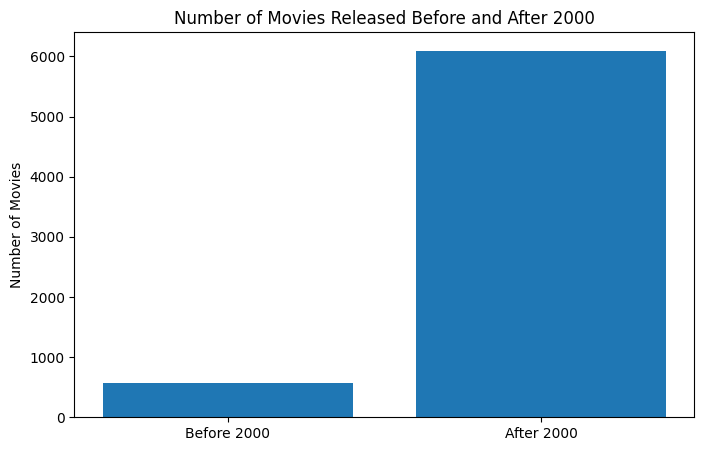

In [70]:
#Visual 1 - FILL IN

# filter movies released before and after 2000
before_2000 = combined_df[combined_df['Date'] < '2000-01-01']
after_2000 = combined_df[combined_df['Date'] >= '2000-01-01']

# count the number of movies
counts = {
    "Before 2000": len(before_2000),
    "After 2000": len(after_2000)
}

# Plotting the counts
plt.figure(figsize=(8, 5))
plt.bar(counts.keys(), counts.values())
plt.title("Number of Movies Released Before and After 2000")
plt.ylabel("Number of Movies")
plt.show()

*Answer to research question:* AS I see, movies after 2000 are grater than before, before 2000 movies almost near to 1000, but after 2000 is closer to 6000.

*Research question:* *Q2* ( What is year has most released  of movies ? )


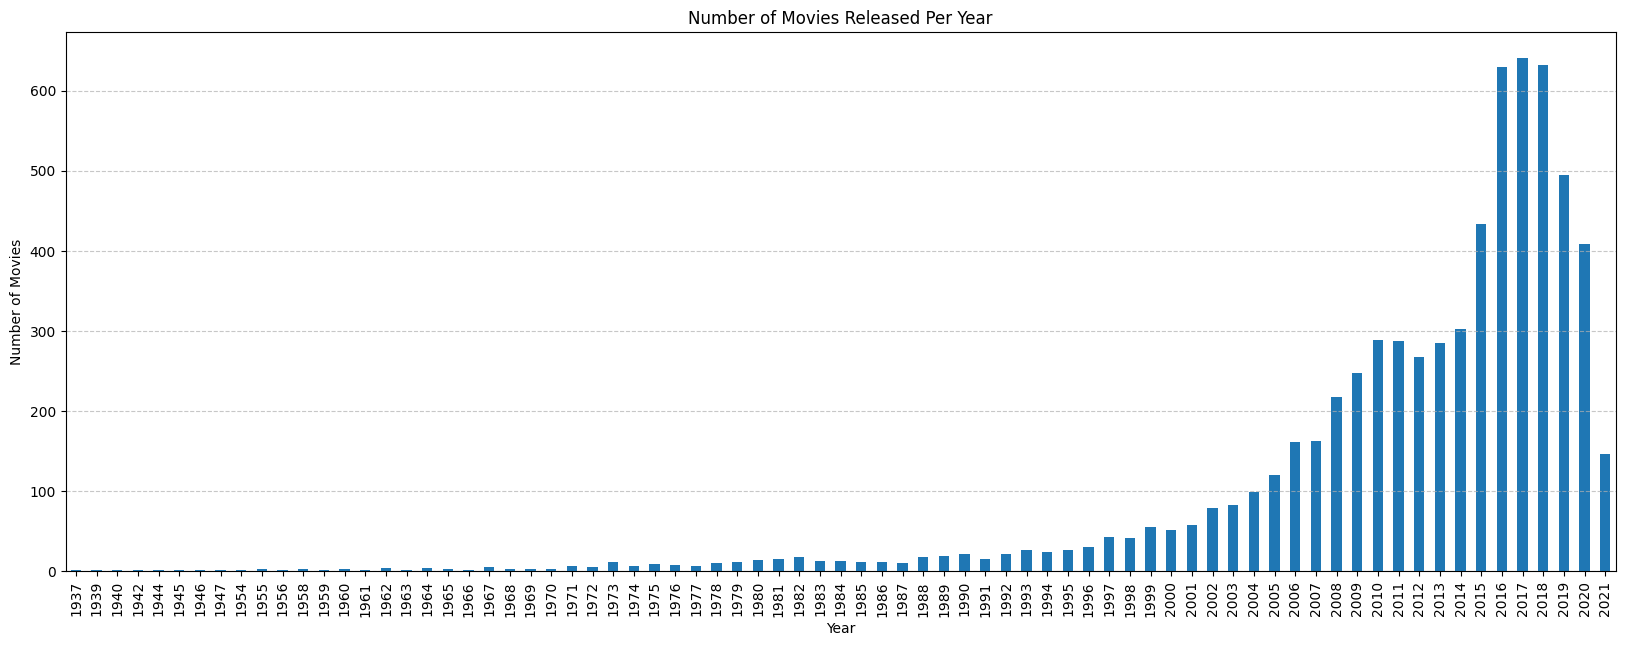

In [71]:
#Visual 2 - FILL IN
# extract the year from the 'Date' column
combined_df['Year'] = combined_df['Date'].dt.year

# the number of movies released each year
movies_per_year = combined_df['Year'].value_counts().sort_index()

# Plot the number of movies released per year
plt.figure(figsize=(20, 7))
movies_per_year.plot(kind='bar', title='Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Answer to research question:* Oldest movie in the dataset was in 1937, but in over years movies are increasing especially from 2000, the highest between ( 2016 to 2018 ) these year was so great for movies

*Research question:* *Q3* ( Which year had the highest average movie duration, and how did the average durations vary across years? )


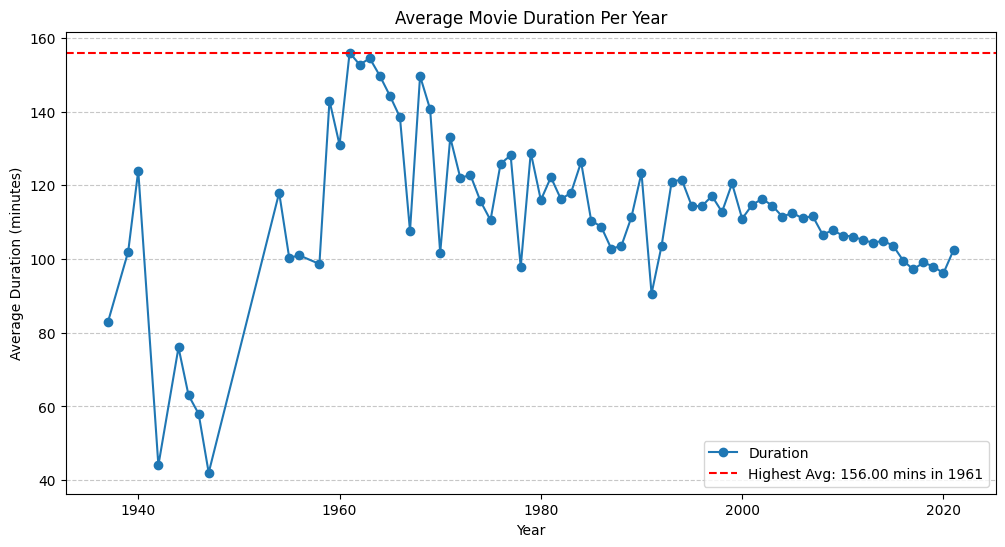

In [72]:
#Visual 3 - FILL IN
# the average movie duration for each year
average_duration_per_year = combined_df.groupby('Year')['Duration'].mean()

# highest average duration
highest_avg_duration_year = average_duration_per_year.idxmax()
highest_avg_duration_value = average_duration_per_year.max()

# plot the average movie durations across years
plt.figure(figsize=(12, 6))
average_duration_per_year.plot(kind='line', marker='o', title='Average Movie Duration Per Year')
plt.axhline(y=highest_avg_duration_value, color='red', linestyle='--', label=f'Highest Avg: {highest_avg_duration_value:.2f} mins in {highest_avg_duration_year}')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Answer to research question:* Movies before 1960 movies was so long near to 160 min more than 2hrs, over years duration decrease to stay between 100 mins to 120 mins.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* *Answer:* Thi project was Difficult to complete especially gathering two related datasets, but after back to lessons and learn carefully, I discover information first time I know before, which is about movies how it is increase after 2000 and how was movies so long inIn the nineties maybe the reason because of those day the technologies are not in the top like today, however, always, during days most of things become higher.